## Book Genre Classifier- EDA

Tangible A.I. Internship Project

This notebook contains some exploratory data analysis and visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('newdf.csv', index_col=False)

In [5]:
del df['Unnamed: 0']

In [27]:
del df.Unnamed

AttributeError: Unnamed

In [6]:
df

author publication_date  \
0            George Orwell          8/17/45   
1          Anthony Burgess             1962   
2             Albert Camus             1947   
3     Erich Maria Remarque          1/29/29   
4        Ursula K. Le Guin             1968   
...                    ...              ...   
8981          Timothy Zahn             2007   
8982            Andy McNab             1997   
8983           Vince Flynn           6/1/00   
8984                 Jay-Z         11/16/10   
8985    Fyodor Dostoyevsky             1846   

                                                  genre  \
0     {"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt":...   
1     {"/m/06n90": "Science Fiction", "/m/0l67h": "N...   
2     {"/m/02m4t": "Existentialism", "/m/02xlf": "Fi...   
3     {"/m/098tmk": "War novel", "/m/016lj8": "Roman...   
4     {"/m/0dwly": "Children's literature", "/m/01hm...   
...                                                 ...   
8981                    {"/m/06n90": "Science Fiction"}   
8982  {"/m/01jfsb": "Thriller", "/m/02xlf": "Fiction...   
8983   {"/m/01jfsb": "Thriller", "/m/02xlf": "Fiction"}   
8984                       {"/m/0xdf": "Autobiography"}   
8985  {"/m/02ql9": "Epistolary novel", "/m/014dfn": ...   

                                           plot_summary  \
0      Old Major, the old boar on the Manor Farm, ca...   
1      Alex, a teenager living in near-future Englan...   
2      The text of The Plague is divided into five p...   
3      The book tells the story of Paul Bäumer, a Ge...   
4      Ged is a young boy on Gont, one of the larger...   
...                                                 ...   
8981   The story starts with former government agent...   
8982   The series follows the character of Nick Ston...   
8983   The reader first meets Rapp while he is doing...   
8984   The book follows very rough chronological ord...   
8985   Makar Devushkin and Varvara Dobroselova are s...   

                                            clean_genre  \
0     ['Roman à clef', 'Satire', "Children's literat...   
1     ['Science Fiction', 'Novella', 'Speculative fi...   
2             ['Fiction', 'Absurdist fiction', 'Novel']   
3                         ['War novel', 'Roman à clef']   
4     ["Children's literature", 'Fantasy', 'Speculat...   
...                                                 ...   
8981                                ['Science Fiction']   
8982                ['Thriller', 'Fiction', 'Suspense']   
8983                            ['Thriller', 'Fiction']   
8984                                  ['Autobiography']   
8985        ['Epistolary novel', 'Speculative fiction']   

                                          clean_summary  \
0     old major, the old boar on the manor farm, cal...   
1     alex, a teenag live in near-futur england, lea...   
2     the text of the plagu is divid into five parts...   
3     the book tell the stori of paul bäumer, a germ...   
4     ged is a young boy on gont, one of the larger ...   
...                                                 ...   
8981  the stori start with former govern agent, fran...   
8982  the seri follow the charact of nick stone, an ...   
8983  the reader first meet rapp while he is do a co...   
8984  the book follow veri rough chronolog order, wh...   
8985  makar devushkin and varvara dobroselova are se...   

                         clean_title  char_count  word_count  word_density  \
0                        animal farm        5812         957      6.066806   
1                 a clockwork orange        6121         998      6.127127   
2                         the plague        6642        1119      5.930357   
3     all quiet on the western front        4283         770      5.555123   
4               a wizard of earthsea        5850        1066      5.482662   
...                              ...         ...         ...           ...   
8981                  the third lynx         939         160      5.83229

In [4]:
df['clean_genre'] = df['clean_genre'].apply(eval)

In [5]:
def to_1d(series):
    return pd.Series([x for _list in series for x in _list])


In [6]:
genre_df = pd.DataFrame(to_1d(df['clean_genre']).value_counts())

In [7]:
genre_df.reset_index(inplace=True)
genre_df.columns = ['genre', 'count']
genre_df

genre  count
0                                    Fiction   3675
1                        Speculative fiction   3271
2                                      Novel   2088
3                            Science Fiction   2001
4                                    Fantasy   1863
5                      Children's literature   1628
6                                    Mystery    973
7                     Young adult literature    625
8                              Crime Fiction    557
9                                   Suspense    538
10                                  Thriller    429
11                                    Horror    383
12                             Romance novel    316
13                        Historical fiction    314
14                           Adventure novel    268
15                         Detective fiction    188
16                               Non-fiction    170
17                               Spy fiction    164
18                         Alternate history    153
19                                    Comedy    105
20                                    Satire    102
21                            Gothic fiction     94
22                             Autobiography     78
23                                 War novel     75
24                               Comic novel     68
25                                 Biography     67
26                    Autobiographical novel     63
27                                   Novella     63
28                              High fantasy     60
29                               Short story     53
30                                    Humour     50
31                                    Memoir     48
32                                   History     47
33                           Techno-thriller     44
34                                 Steampunk     43
35  Apocalyptic and post-apocalyptic fiction     42
36             Utopian and dystopian fiction     41
37                        Paranormal romance     36
38                                   Western     35
39                             Bildungsroman     33
40                             Urban fantasy     32
41                                  Gamebook     32
42                              Black comedy     31
43                                Philosophy     30
44                                 Reference     28
45                  Military science fiction     27
46                              Picture book     26
47                                Hardboiled     23
48                          Epistolary novel     23
49                       Psychological novel     23
50                                     Drama     22
51                         Absurdist fiction     22
52                              Roman à clef     22
53                           Western fiction     21
54                             Magic realism     21

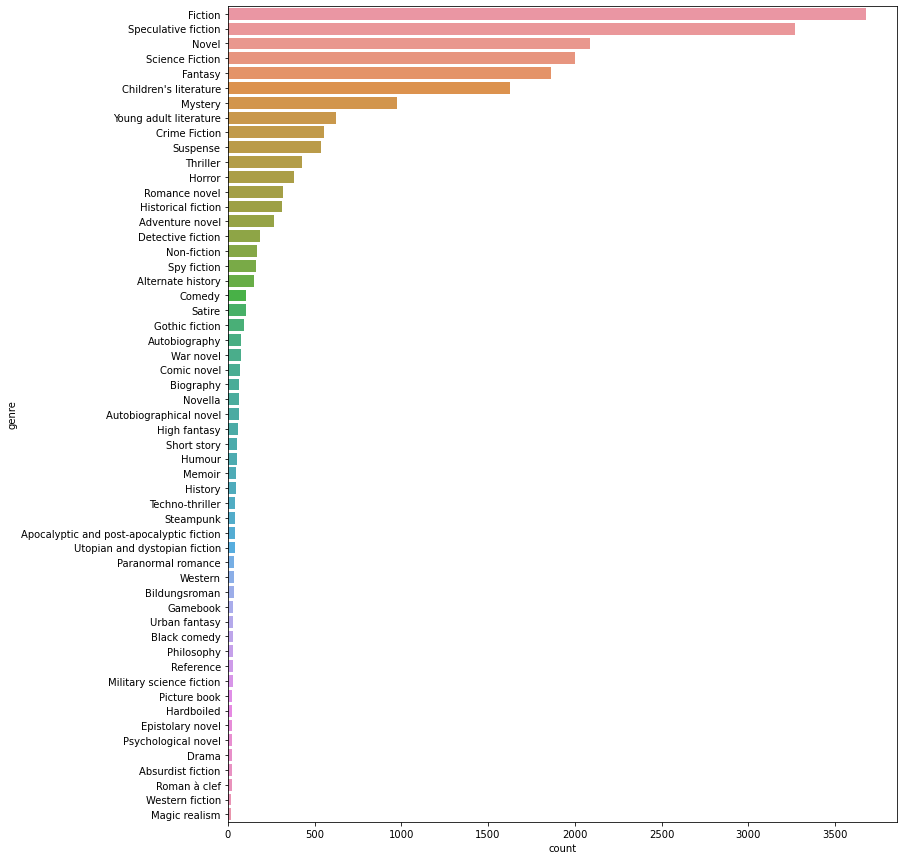

In [8]:
g = genre_df.nlargest(columns="count", n = 55) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "count", y = "genre") 
plt.show()
    

### Count genres per book summary

<AxesSubplot:xlabel='Genres per summary'>

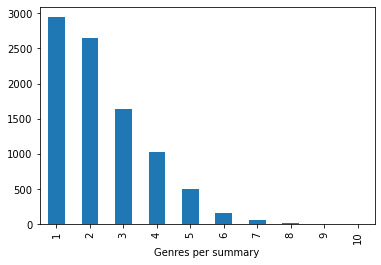

In [9]:
df['genre_count'] = df['clean_genre'].apply(len)
df['genre_count'].value_counts().plot(kind = 'bar', xlabel= 'Genres per summary')

In [10]:
df['genre_count']

0       5
1       6
2       3
3       2
4       5
       ..
8981    1
8982    3
8983    2
8984    1
8985    2
Name: genre_count, Length: 8986, dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'author', 'publication_date', 'genre', 'plot_summary',
       'clean_genre', 'clean_summary', 'clean_title', 'char_count',
       'word_count', 'word_density', 'sent_count', 'unique_word_count',
       'unique_vs_words', 'summary_tokenized', 'nouns', 'noun_count', 'verbs',
       'verb_count', 'compound_score', 'pos_score', 'neg_score', 'neu_score',
       'genre_count'],
      dtype='object')

Text(0.5, 0, 'Word Count in Plot')

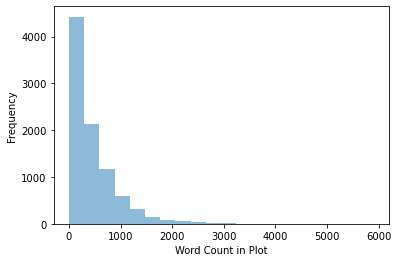

In [12]:
df['word_count'].plot.hist(bins= 20, alpha=0.5).set_xlabel("Word Count in Plot")

Text(0.5, 0, 'Noun and Verb Counts')

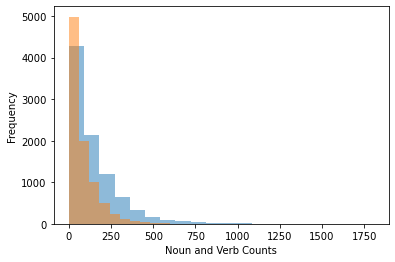

In [13]:
df['noun_count'].plot.hist(bins= 20, alpha=0.5).set_xlabel("Noun and Verb Counts")
df['verb_count'].plot.hist(bins= 20, alpha=0.5).set_xlabel("Noun and Verb Counts")

Text(0.5, 0, 'Sentiment')

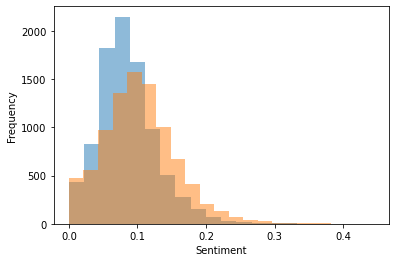

In [14]:
df['pos_score'].plot.hist(bins= 20, alpha=0.5).set_xlabel("Sentiment")
df['neg_score'].plot.hist(bins= 20, alpha=0.5).set_xlabel("Sentiment")